# Bigmarket Sale Prediction

## Initializing Packages and Importing Data

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train=pd.read_csv(r"C:\Users\pranavi\Desktop\bigmart-sales-master\train.csv")
test=pd.read_csv(r"C:\Users\pranavi\Desktop\bigmart-sales-master\test.csv")

In [5]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
test.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
5676,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1
5680,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


 Most of the items in the train dataset present 8523 non-null values. However, there are some cases such as Item_Weight and Outlet_Size which seem to present Null values. We always have to consider if this absence of values has a significant meaning. In this case it does not since all values should have weight higher than 0 and a stores cannot exist with zero size.
 Moreover, from the 12 features, 5 are numeric and 7 categorical.

In [8]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


#### Organising of our analysis

1 Exploratory data analysis (EDA)
  -Data Pre-processing
2 Feature engineering
  -Feature Transformation
3 Modeling
4 Hyperparameter tuning
5 Ensembling


#### 1. Exploratory Data Analysis (EDA)

In [10]:
#Check for duplicates
idsUnique = len(set(train.Item_Identifier))
idsTotal = train.shape[0]
idsDupli = idsTotal - idsUnique
print("There are " + str(idsDupli) + " duplicate IDs for " + str(idsTotal) + " total entries")

There are 6964 duplicate IDs for 8523 total entries


In [57]:
idsUnique

1559

In [58]:
idsTotal

8523

#### 1.1. Univariate Analysis

To get an idea of the distribution of numerical variables, histograms are an excellent starting point. Let’s begin by generating one for Item_Outlet_Sales, our target variable.

#### 1.1.1. Distribution of the target variable: Item_Outlet_Sales

C:\Users\pranavi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Item_Outlet_Sales Distribution')

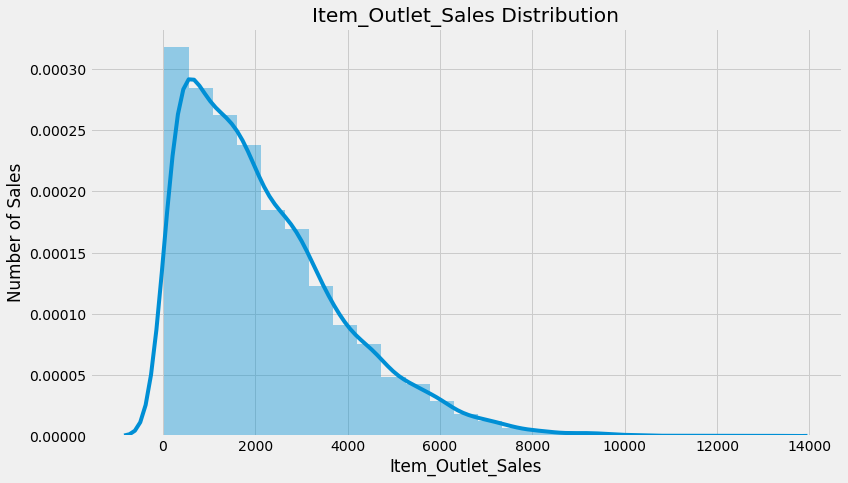

In [11]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(train.Item_Outlet_Sales, bins = 25)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,1))
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Number of Sales")
plt.title("Item_Outlet_Sales Distribution")

In [12]:
print ("Skew is:", train.Item_Outlet_Sales.skew())
print("Kurtosis: %f" % train.Item_Outlet_Sales.kurt())

Skew is: 1.1775306028542798
Kurtosis: 1.615877


We can see that our target variable is skewed to the right, towards the higher sales, with higher concentration on lower sales.To make this distribution more symmetrical, we could try taking its square root. Nevertheless, my results showed that the RMSE increased with this alteration.


#### 1.1.2. Numerical Predictors

In [14]:
numeric_features=train.select_dtypes(include=[np.number])
numeric_features.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

#### 1.1.2.1. Correlation between Numerical Predictors and Target variable

In [17]:
corr=numeric_features.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [18]:
print(corr['Item_Outlet_Sales'].sort_values(ascending=False))

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.014123
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64


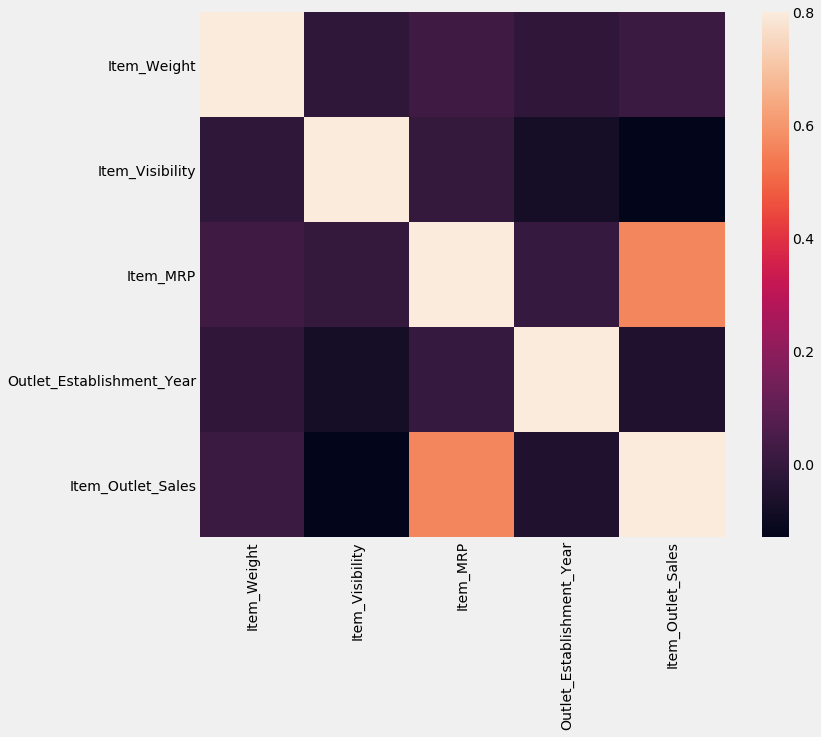

In [20]:
#correlation matrix
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8, square=True)

From the current numeric variables we can observe that the Item_Visibility is the feature with the lowest correlation with our target variable. Therefore, the less visible the product is in the store the higher the price will be. This is curious since from the initial assumptions this variables was expected to have high impact in the sales increase. Nevertheless, since this is not an expected behaviour and we should investigate. Moreover, this feature has a negative correlation with all of the other features. Furthermore, the most positive correlation belongs to Item_MRP .

#### 1.1.3. Categorical Predictors

#### 1.1.3.1. Distribution of the variable Item_Fat_Content

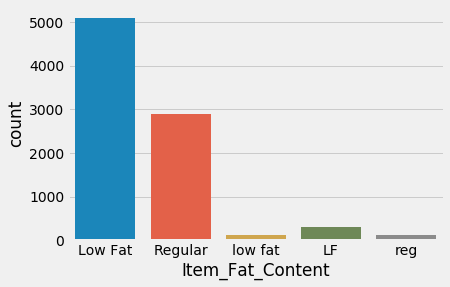

In [21]:
sns.countplot(train.Item_Fat_Content)

For Item_Fat_Content there are two possible choices : “Low Fat” or “Regular”. However, in our data we have these two types of Fat writen in different manners. This must be corrected.

#### 1.1.3.2. Distribution of the variable Item_Type

Looking at the list of Item_Type we see there are sixteen different types. This is a high number of unique values for a categorical variable. Therefore we must try to think of a way to drastically reduce this number.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

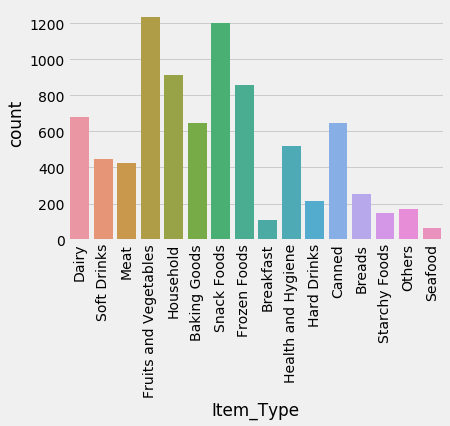

In [23]:
sns.countplot(train.Item_Type)
plt.xticks(rotation=90)

#### 1.1.3.3. Distribution of the variable Outlet_Size

There seems to be a low number of stores with size equals to “High”.Most of the existent stores seem
to be either “Small” or “Medium”. It will be interesting to see how this variable relates to our target If “High” size stores have better results as initially expected or due to this number distribution sales results might be similar.

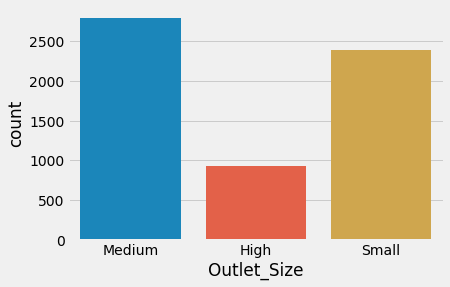

In [26]:
sns.countplot(train.Outlet_Size)

#### 1.1.3.4. Distribution of the variable Outlet_Location_Type

Bigmart appears to be a supermarket brand that is more present in “Small” to “Medium” size cities than in more densily populated locations.

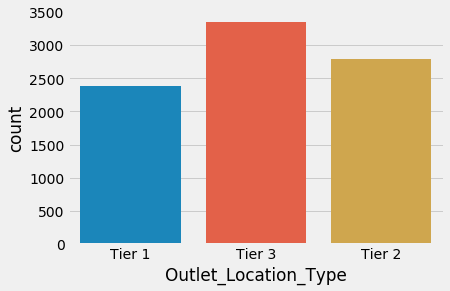

In [27]:
sns.countplot(train.Outlet_Location_Type)

#### 1.1.3.5. Distribution of the variable Outlet_Type

It looks like Supermarket Type2 , Grocery Store and Supermarket Type3 all have low expression in this distribution. Maybe we can create a single category with all of the three. Nevertheless, before doing this we must see their impact in the Item_Outlet_Sales .

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

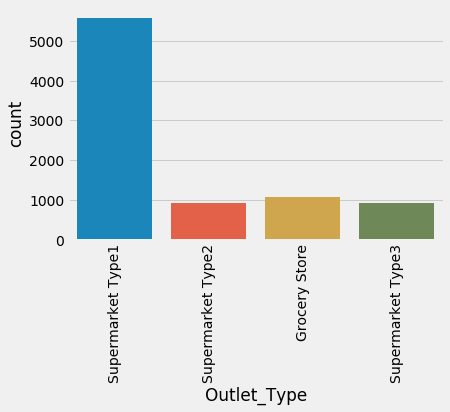

In [29]:
sns.countplot(train.Outlet_Type)
plt.xticks(rotation=90)

#### 1.2. Bivariate Analysis


Firstly we individually analysed some of the existent features, now it is time to understand the relationship between our target variable and predictors as well as the relationship among predictors.

#### 1.2.1. Numerical Variables

In [32]:
numeric_features.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

#### 1.2.1.1. Item_Weight and Item_Outlet_Sales analysis

We saw previously that Item_Weight had a low correlation with our target variable. If we plot both features we can see that relationship.

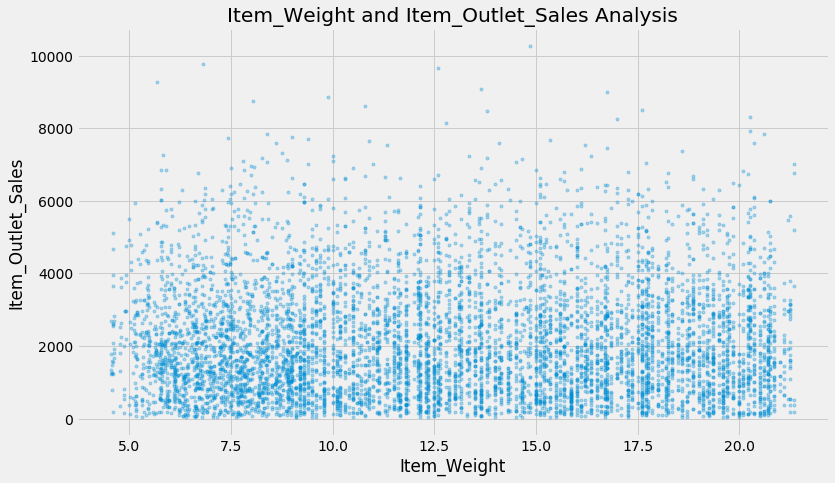

In [33]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Weight and Item_Outlet_Sales Analysis")
plt.plot(train.Item_Weight, train["Item_Outlet_Sales"],'.', alpha = 0.3)

#### 1.2.1.2. Item_Visibility and Item_Outlet_Sales analysis



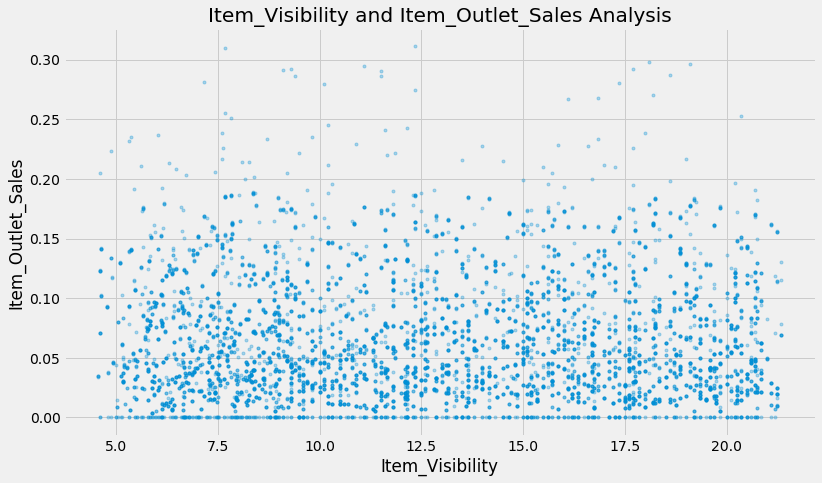

In [59]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Visibility")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Visibility and Item_Outlet_Sales Analysis")
plt.plot(train.Item_Weight, train["Item_Visibility"],'.', alpha = 0.3)

As we can see from the bar charts above, most sold products have lower visibility. Furthermore, there is a concerning number of products with visibility zero.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 <a list of 16 Text xticklabel objects>)

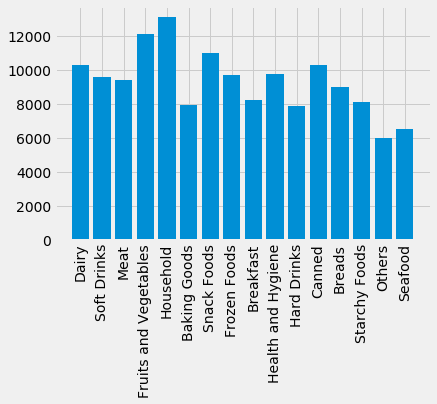

In [39]:
plt.bar(train.Item_Type,train.Item_Outlet_Sales)
plt.xticks(rotation=90)

#### 1.2.1.3. Outlet_Establishment_Year and Item_Outlet_Sales analysis

There seems to be no significant meaning between the year of store establishment and the sales for the items. 1998 has low values but thet might be due to the fact the few stores opened in that year.

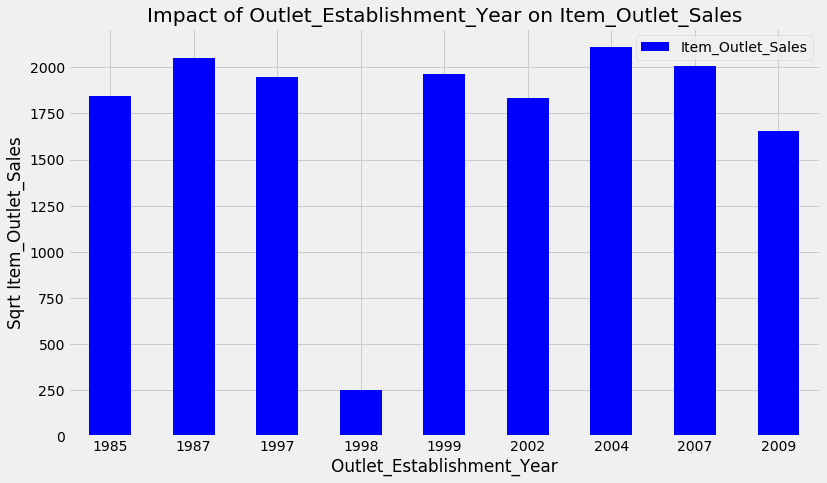

In [44]:
Outlet_Establishment_Year_pivot = \
train.pivot_table(index='Outlet_Establishment_Year', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Establishment_Year_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Outlet_Establishment_Year")
plt.ylabel("Sqrt Item_Outlet_Sales")
plt.title("Impact of Outlet_Establishment_Year on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

#### 1.2.2. Categorical Variables

#### 1.2.2.1. Impact of Item_Fat_Content onItem_Outlet_Sales

Daily use products should have a higher tendency to sell as compared to the specific use products.
“Low Fat” products seem to have higher sales values than “Regular” products.

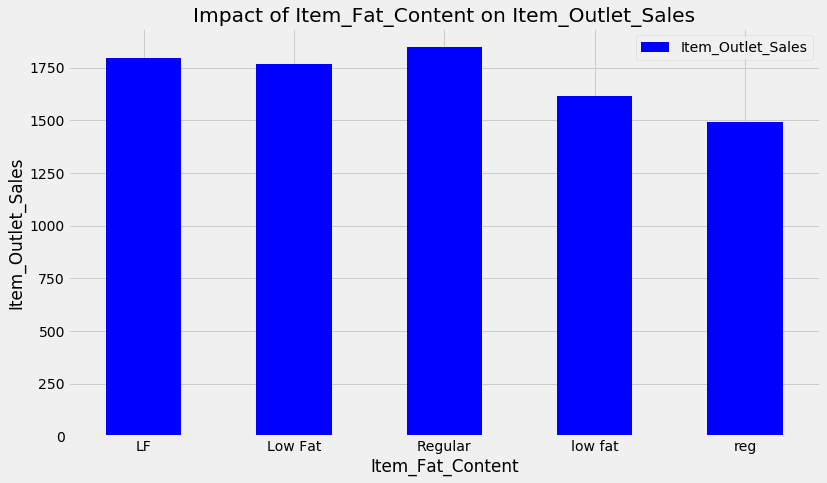

In [46]:
Item_Fat_Content_pivot = \
train.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.median)
Item_Fat_Content_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Item_Fat_Content")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

#### 1.2.2.2. Impact of Outlet_Identifier on Item_Outlet_Sales

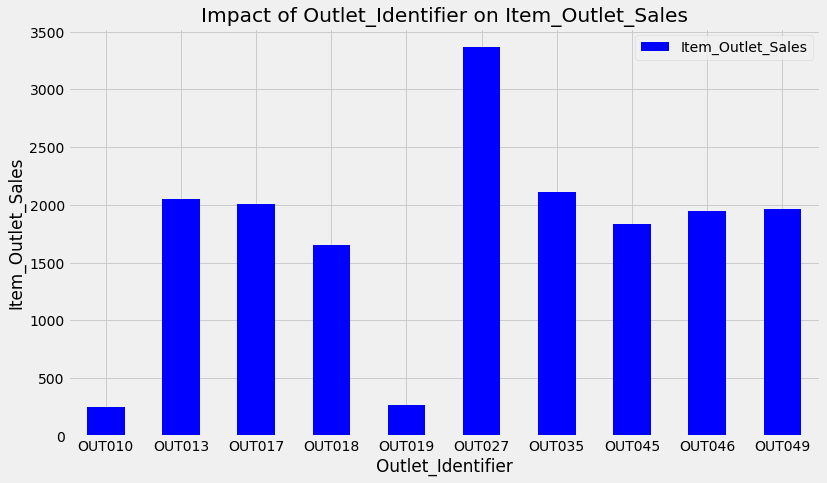

In [48]:
Outlet_Identifier_pivot = \
train.pivot_table(index='Outlet_Identifier', values='Item_Outlet_Sales', aggfunc=np.median)
Outlet_Identifier_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel('Outlet_Identifier')
plt.ylabel('Item_Outlet_Sales')
plt.title('Impact of Outlet_Identifier on Item_Outlet_Sales')
plt.xticks(rotation=0)
plt.show()

From the ten stores, two are Groceries whereas six are Supermarket Type1, one Supermarket Type2 and one Supermarket Type3. You can get this information from the pivot_tables below.

From the above bar chart, we see that thr groceries (“OUT010”, “OUT019”) have the lowest sales results which is expected followed by the Supermarket Type 2 (“OUT018”). Curiously, most stores are of type Supermarket Type1 of size “High” and do not have the best results. The best results belong to “Out027” which is a “Medium” size Supermarket Type 3.

In [51]:
train.pivot_table(values='Outlet_Type',
                 columns='Outlet_Identifier',aggfunc=lambda x:x.mode())

Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type1,Supermarket Type2,Grocery Store,Supermarket Type3,Supermarket Type1,Supermarket Type1,Supermarket Type1,Supermarket Type1


In [65]:
train.pivot_table(values='Outlet_Type',
                 columns='Outlet_Size',aggfunc=lambda x:x.mode())

Outlet_Size,High,Medium,Small
Outlet_Type,Supermarket Type1,Supermarket Type3,Supermarket Type1


#### 1.2.2.3. Impact of Outlet_Size on Item_Outlet_Sales

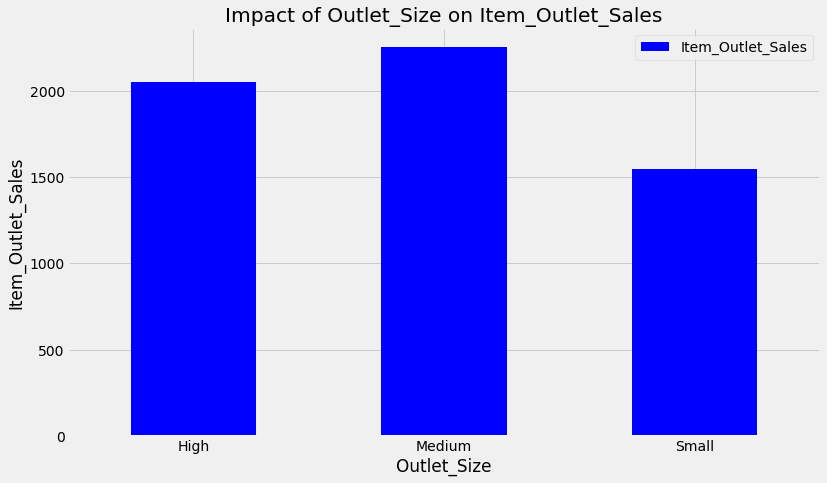

In [55]:
Outlet_Size_pivot = \
train.pivot_table(index='Outlet_Size', values='Item_Outlet_Sales', aggfunc=np.median)
Outlet_Size_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel('Outlet_Size')
plt.ylabel('Item_Outlet_Sales')
plt.title('Impact of Outlet_Size on Item_Outlet_Sales')
plt.xticks(rotation=0)
plt.show()

consumers tend to prefer medium size stores instead of big size. As we saw in the previous section, most stores have size “Medium” but still the “High” and “Small” stores which are clearly in an inferior number can beat or even come close to their numbers.

#### 1.2.2.4. Impact of Outlet_Type on Item_Outlet_Sales

From this analysis possibly it would be a good idea to creat a new feature that shows the sales ratio according to the store size.

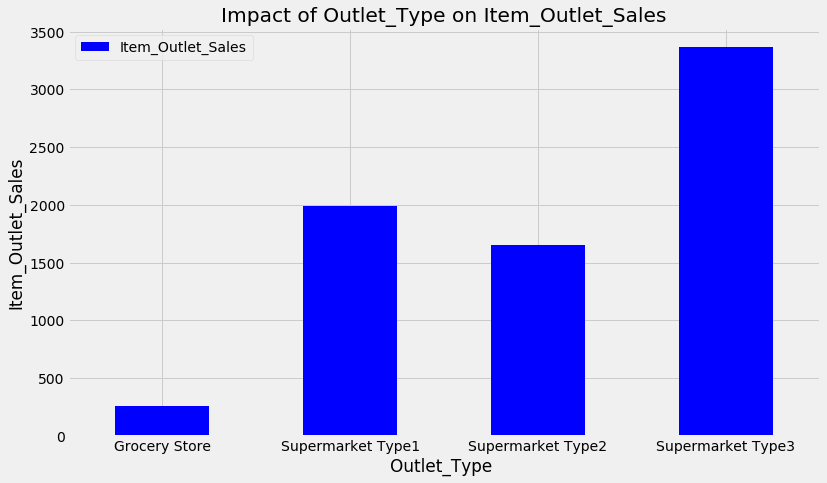

In [56]:
Outlet_Type_pivot = \
train.pivot_table(index='Outlet_Type', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Type_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Outlet_Type ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

#### 1.2.2.5. Impact of Outlet_Location_Type on Item_Outlet_Sales

Do Tier 1 cities have higher sales? This was one of the premisses we made in the start of this study. However, if we look at our results we see that in fact it is stores from Tier 2 cities that present the highest results, followed by Tier 3 cities and with Tier 1 cities with the lowest results of the three type of locations.

From the pivot_table it is easy to see that Tier2 and Tier3 cities are those that have highest representation of stores.

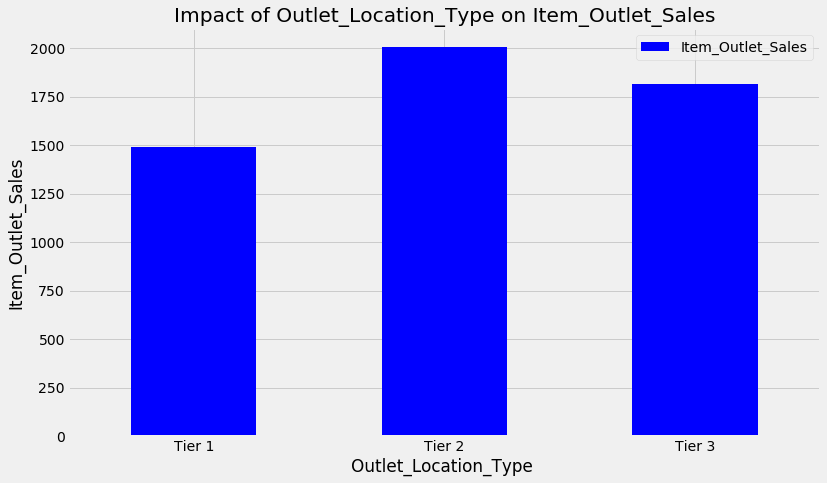

In [60]:
Outlet_Location_Type_pivot = \
train.pivot_table(index='Outlet_Location_Type', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Location_Type_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Outlet_Location_Type ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Location_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

In [62]:
train.pivot_table(values='Outlet_Location_Type',
                  columns='Outlet_Type',aggfunc=lambda x:x.mode())

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Location_Type,Tier 3,Tier 2,Tier 3,Tier 3


###  Data Pre-Processing

Regarding the variables which were thought to have high impact on the product’s sale price. Item_Visibility does not have a high positive correlation as expected, quite the opposite. As well, there are no big variations in the sales due to theItem_Type . On the other hand, it was possible to see that the size, location and type of store could have a positive impact on sales.
If we look at variable Item_Identifer , we can see different groups of letters per each product such as ‘FD’ (Food), ‘DR’(Drinks) and ‘NC’ (Non-Consumable). From this we can create a new variable.
Regarding Item_Visibility there are items with the value zero. This does not make lot of sense, since this is indicating those items are not visible on the store.
Similar, Item_Weight and Outlet_Size seem to present NaN values.
There seems to be 1562 unique items only available in a single store.
Item_Fat_Content has vale “low fat” writen in different manners.
For Item_Type we try to create a new feature that does not have 16 unique values.
Outlet_Establishment_Year besides being a hidden category, its values vary from 1985 to 2009 . It must be converted to how old the store is to better see the impact on sales.

#### 2. 1. Looking for missing values

In [63]:
# Join Train and Test Dataset
#Create source column to later separate the data easily
train['source']='train'
test['source']='test'
data = pd.concat([train,test], ignore_index = True)
print(train.shape, test.shape, data.shape)

(8523, 13) (5681, 12) (14204, 13)


C:\Users\pranavi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """


The previous image shows that our data has some NaNvalues. Numpy’s NaNvalues are good because Pandas is able to recognize this object and count it. However, let’s image that instead of Nulla NaNthere’s, for example, “Not available”. This is counted as a string and not NaNwhich masks our missing values.

In [64]:
#Check the percentage of null values per variable
data.isnull().sum()/data.shape[0]*100 #show values in percentage


Item_Fat_Content              0.000000
Item_Identifier               0.000000
Item_MRP                      0.000000
Item_Outlet_Sales            39.995776
Item_Type                     0.000000
Item_Visibility               0.000000
Item_Weight                  17.171219
Outlet_Establishment_Year     0.000000
Outlet_Identifier             0.000000
Outlet_Location_Type          0.000000
Outlet_Size                  28.273726
Outlet_Type                   0.000000
source                        0.000000
dtype: float64


Note that the Item_Outlet_Salesis the target variable and 39% of its values are NaN. For this case only, the missing values are the ones which belong to the test set. Remember we added the train and test datasets. So we need not worry about it.

Neverthless, we’ll impute the missing values in Item_Weight and Outlet_Size.

#### 2.2. Imputing Missing Values

We’ve seen previously on the EDA section that the Item_Weight and the Outlet_Size had missing values. Hence, for now we will impute for this missing values the mean for each corresponding variable.

#### 2.2.1. Imputing the mean for Item_Weight missing values

In [66]:
#aggfunc is mean by default! Ignores NaN by default
item_avg_weight = data.pivot_table(values='Item_Weight', index='Item_Identifier')
print(item_avg_weight)

                 Item_Weight
Item_Identifier             
DRA12                 11.600
DRA24                 19.350
DRA59                  8.270
DRB01                  7.390
DRB13                  6.115
DRB24                  8.785
DRB25                 12.300
DRB48                 16.750
DRC01                  5.920
DRC12                 17.850
DRC13                  8.260
DRC24                 17.850
DRC25                  5.730
DRC27                 13.800
DRC36                 13.000
DRC49                  8.670
DRD01                 12.100
DRD12                  6.960
DRD13                 15.000
DRD15                 10.600
DRD24                 13.850
DRD25                  6.135
DRD27                 18.750
DRD37                  9.800
DRD49                  9.895
DRD60                 15.700
DRE01                 10.100
DRE03                 19.600
DRE12                  4.590
DRE13                  6.280
...                      ...
NCX05                 15.200
NCX06         

data.pivot_table() allows us to create a table with all the identifiers and their respective weight. Since this method ignores all NaN values and the same item exists in more than one store, for those missing the weight we can retrieve from this table the mean() weight of all products with the same Item_Identifier.

In [69]:
#Note: The previous idea becomes more clear if you run this.
data[:][data['Item_Identifier'] == 'DRI11']

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
18,Low Fat,DRI11,113.2834,2303.6680,Hard Drinks,0.034238,NaN,1985,OUT027,Tier 3,Medium,Supermarket Type3,train
1366,Low Fat,DRI11,115.9834,345.5502,Hard Drinks,0.060237,NaN,1985,OUT019,Tier 1,Small,Grocery Store,train
3127,Low Fat,DRI11,113.3834,2073.3012,Hard Drinks,0.034458,8.26,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
5310,Low Fat,DRI11,113.7834,115.1834,Hard Drinks,0.057586,8.26,1998,OUT010,Tier 3,NaN,Grocery Store,train
7022,Low Fat,DRI11,115.7834,2073.3012,Hard Drinks,0.034398,8.26,2004,OUT035,Tier 2,Small,Supermarket Type1,train
7192,Low Fat,DRI11,116.0834,1267.0174,Hard Drinks,0.034544,8.26,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
8483,Low Fat,DRI11,117.0834,1612.5676,Hard Drinks,0.034474,8.26,2002,OUT045,Tier 2,NaN,Supermarket Type1,train
10246,Low Fat,DRI11,113.5834,NaN,Hard Drinks,0.034404,8.26,1997,OUT046,Tier 1,Small,Supermarket Type1,test
10674,Low Fat,DRI11,115.3834,NaN,Hard Drinks,0.034376,8.26,1987,OUT013,Tier 3,High,Supermarket Type1,test
12022,Low Fat,DRI11,115.9834,NaN,Hard Drinks,0.034599,8.26,2007,OUT017,Tier 2,NaN,Supermarket Type1,test


In [89]:
def impute_weight(cols):
    Weight = cols[0]
    Identifier = cols[1]
    
    if pd.isnull(Weight):
        return item_avg_weight['Item_Weight'][item_avg_weight.index == Identifier]
    else:
        return Weight
print ('Orignal #missing: %d'%sum(data['Item_Weight'].isnull()))
data['Item_Weight'] = data[['Item_Weight','Item_Identifier']].apply(impute_weight,axis=1).astype(float)
print ('Final #missing: %d'%sum(data['Item_Weight'].isnull()))

Orignal #missing: 0
Final #missing: 0


After running the above code, in which we use function impute_weight to you get the following message showing there are no more missing values.

#### 2.2.2. Imputing Outlet_Size missing values with the mode

For this example, we will apply the same logic. In this case, instead of using the default codeaggfunc = mean() for the pivot_table()we will use the mode.

In [71]:
#Import mode function:
from scipy.stats import mode
#Determing the mode for each
outlet_size_mode = data.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=lambda x:x.mode())
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [72]:
def impute_size_mode(cols):
    Size = cols[0]
    Type = cols[1]
    if pd.isnull(Size):
        return outlet_size_mode.loc['Outlet_Size'][outlet_size_mode.columns == Type][0]
    else:
        return Size
print ('Orignal #missing: %d'%sum(data['Outlet_Size'].isnull()))
data['Outlet_Size'] = data[['Outlet_Size','Outlet_Type']].apply(impute_size_mode,axis=1)
print ('Final #missing: %d'%sum(data['Outlet_Size'].isnull()))


Orignal #missing: 4016
Final #missing: 0


#### 3. Feature Engineering

So we now got rid of all the missing values in our data that might negatively influence our analysis. If you remember, during our analysis we saw some nuances in the data and now is time to fix them and make our data ready for analysis.

#### 3.1. Should we combine Outlet_Type?



In our exploration we questioned “Is it viable to combine Supermarket Type 2 and Type 3?” Let’s check.

#Creates pivot table with Outlet_Type and the mean of #Item_Outlet_Sales. Agg function is by default mean()

In [73]:
data.pivot_table(values='Item_Outlet_Sales', columns='Outlet_Type')

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Item_Outlet_Sales,339.8285,2316.181148,1995.498739,3694.038558


As observed by the results below, the average product sales are significantly different so we leave as is.

#### 3.2. Item_Visibility minimum value is 0

In [79]:
#Get all Item_Visibility mean values for respective Item_Identifier
visibility_item_avg = data.pivot_table(values='Item_Visibility',index='Item_Identifier')
visibility_item_avg.head()

,Item_Visibility
Item_Identifier,
DRA12,0.042702
DRA24,0.045646
DRA59,0.146722
DRB01,0.089703
DRB13,0.007554


In [77]:
def impute_visibility_mean(cols):
    visibility = cols[0]
    item = cols[1]
    if visibility == 0:
        return visibility_item_avg['Item_Visibility'][visibility_item_avg.index == item]
    else:
        return visibility
print ('Original #zeros: %d'%sum(data['Item_Visibility'] == 0))
data['Item_Visibility'] = data[['Item_Visibility','Item_Identifier']].apply(impute_visibility_mean,axis=1).astype(float)
print ('Final #zeros: %d'%sum(data['Item_Visibility'] == 0))


Original #zeros: 879
Final #zeros: 0


#### 3.3. Determine the years of operation of a store

We talked about using how long has been working instead of the date of start. Remember that the data we have is from 2013. Thus we must consider this year into our calculations-

In [80]:
#Remember the data is from 2013
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

#### 3.4. Create a broad category of Item_Type

Earlier we saw that the Item_Type variable has 16 categories which might not prove to be very useful in our analysis. So it’s a good idea to combine them. If we look closely to the Item_Identifier of each item we see that each one starts with either “FD” (Food), “DR” (Drinks) or “NC” (Non-Consumables). Therefore, we can group the items within these 3 categories

In [83]:
#Get the first two characters of ID:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])

#Rename them to more intuitive categories:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable','DR':'Drinks'})
data['Item_Type_Combined'].value_counts()


Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [86]:
#data.isnull().sum()

#### 3.5. Modify categories of Item_Fat_Content

We found types and difference in representation in categories of Item_Fat_Content variable. This can be corrected as:

In [87]:
#Change categories of low fat:
print('Original Categories:')
print(data['Item_Fat_Content'].value_counts())

Original Categories:
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64


In [88]:
print('\nModified Categories:')
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular',
                                                             'low fat':'Low Fat'})
print(data['Item_Fat_Content'].value_counts())


Modified Categories:
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


Now it makes more sense. But hang on, we also saw in section 3.4. there were some non-consumables as well and a fat-content should not be specified for them. So we can also create a separate category for such kind of observations.

In [ ]:
#Mark non-consumables as separate category in low_fat:
data.loc[data['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
data['Item_Fat_Content'].value_counts()

#### 4. Feature Transformations

#### 4.1. Creating variable Item_Visibility_Mean_Ratio

In the beginning of this article we hypothesized that products that are more visible are likely to have higher sales. For example, we can create a new variable that show us the importance given to a product in a given store according to the mean of significance given to the same product in all other stores.

In [90]:
func = lambda x: x['Item_Visibility']/visibility_item_avg['Item_Visibility']
-p.[visibility_item_avg.index == x['Item_Identifier']][0]
data['Item_Visibility_MeanRatio'] = data.apply(func,axis=1).astype(float)
data['Item_Visibility_MeanRatio'].describe()

count    14204.000000
mean         1.000000
std          0.207021
min          0.600000
25%          0.879677
50%          0.928859
75%          0.999070
max          1.806056
Name: Item_Visibility_MeanRatio, dtype: float64

#### 4.2. Categorical Variables — One Hot Encoding

Since scikit-learn only accepts numerical variables, we need to convert all categories of nominal variables into numeric types. Let’s start with turning all categorical variables into numerical values using LabelEncoder() (Encode labels with value between 0 and n_classes-1). After that, we can use get_dummies to generate dummy variables from these numerical categorical variables



In [91]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [92]:
#New variable for outlet
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size',
           'Item_Type_Combined','Outlet_Type','Outlet']
for i in var_mod:
    data[i] = le.fit_transform(data[i])

One-Hot-Coding refers to creating dummy variables, one for each category of a categorical variable. For example, the Item_Fat_Content has 3 categories — LowFat,Regular,Non-Edible. One hot coding will remove this variable and generate 3 new variables. Each will have binary numbers — 0 (if the category is not present) and 1(if category is present). This can be done using get_dummies function of Pandas.

In [99]:
#Dummy Variables:
data = pd.get_dummies(data, columns =['Item_Fat_Content','Outlet_Location_Type',
                                      'Outlet_Size','Outlet_Type','Item_Type_Combined','Outlet'])
data.dtypes

Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
source                        object
Outlet_Years                   int64
Item_Visibility_MeanRatio    float64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Outlet_0                       uint8
Outlet_1                       uint8
dtype: object

#### 4.3. Exporting Data



Final step is to convert data back into train and test data sets. Its generally a good idea to export both of these as modified data sets so that they can be re-used for multiple sessions. This can be achieved using following code

In [100]:
#Drop the columns which have been converted to different types:
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

In [101]:
#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

In [102]:
#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

C:\Users\pranavi\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [142]:
#Export files as modified versions:
train.to_csv("data/train_final.csv",index=False)
test.to_csv("data/test_final.csv",index=False)

In [143]:
import os
os.getcwd()

'C:\\Users\\pranavi\\Downloads\\bigmart-sales-master\\bigmart-sales-master'

#### 5. Model Building

In [141]:
train_df = pd.read_csv('data/train_modified.csv')
test_df = pd.read_csv('data/test_modified.csv')

Since I’ll be making many models, instead of repeating the codes again and again, I would like to define a generic function which takes the algorithm and data as input and makes the model, performs cross-validation and generates submission.

In [145]:
#Define target and ID columns:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']
from sklearn import cross_validation, metrics


def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

    #Perform cross-validation:
    cv_score = cross_validation.cross_val_score(alg, dtrain[predictors],(dtrain[target]) , cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print("\nModel Report")
    print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error((dtrain[target]).values, dtrain_predictions)))
    print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    
    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)

#### 5.1. Linear Regression Model


Model Report
RMSE : 1136
CV Score : Mean - 1137 | Std - 42.12 | Min - 1082 | Max - 1216


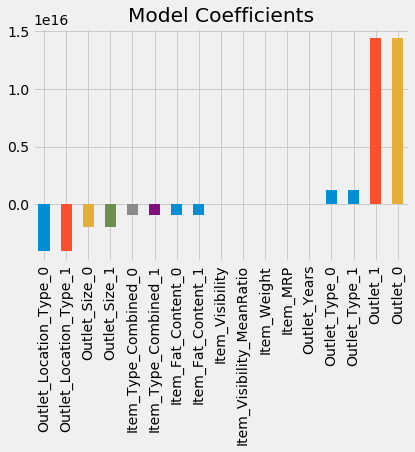

In [117]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression(normalize=True)

predictors = train_df.columns.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'])
modelfit(LR, train_df, test_df, predictors, target, IDcol, 'LR.csv')

coef1 = pd.Series(LR.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

In [114]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression(normalize=True)
predictors = train_df.columns.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'])
modelfit(LR, train_df, test_df, predictors, target, IDcol, 'LR.csv')


Model Report
RMSE : 1136
CV Score : Mean - 1137 | Std - 42.12 | Min - 1082 | Max - 1216


#### 5.2. Ridge Regression Model

In [118]:
from sklearn.linear_model import Ridge
RR = Ridge(alpha=0.05,normalize=True)
modelfit(RR, train_df, test_df, predictors, target, IDcol, 'RR.csv')


Model Report
RMSE : 1139
CV Score : Mean - 1140 | Std - 43.65 | Min - 1086 | Max - 1222



Model Report
RMSE : 1139
CV Score : Mean - 1140 | Std - 43.65 | Min - 1086 | Max - 1222


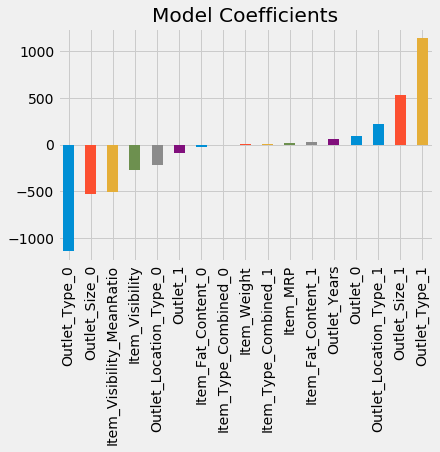

In [119]:
from sklearn.linear_model import Ridge
RR = Ridge(alpha=0.05,normalize=True)
modelfit(RR, train_df, test_df, predictors, target, IDcol, 'RR.csv')

coef2 = pd.Series(RR.coef_, predictors).sort_values()
coef2.plot(kind='bar', title='Model Coefficients')

#### 5.3. Decision Tree Model

In [116]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(DT, train_df, test_df, predictors, target, IDcol, 'DT.csv')


Model Report
RMSE : 1059
CV Score : Mean - 1092 | Std - 42.14 | Min - 1021 | Max - 1174



Model Report
RMSE : 1059
CV Score : Mean - 1092 | Std - 42.14 | Min - 1021 | Max - 1174


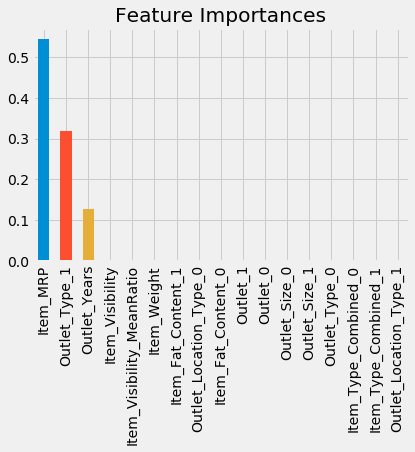

In [121]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(DT, train_df, test_df, predictors, target, IDcol, 'DT.csv')

coef3 = pd.Series(DT.feature_importances_, predictors).sort_values(ascending=False)
coef3.plot(kind='bar', title='Feature Importances')

#### 5.4. Random Forrest Model

In [123]:
RF = DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)
modelfit(RF, train_df, test_df, predictors, target, IDcol, 'RF.csv')


Model Report
RMSE : 1069
CV Score : Mean - 1098 | Std - 42.12 | Min - 1036 | Max - 1181



Model Report
RMSE : 1069
CV Score : Mean - 1098 | Std - 42.12 | Min - 1036 | Max - 1181


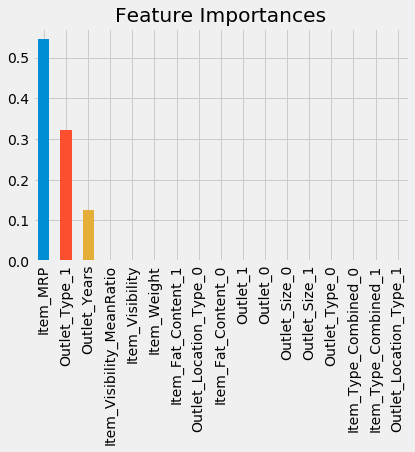

In [124]:
RF = DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)
modelfit(RF, train_df, test_df, predictors, target, IDcol, 'RF.csv')

coef4 = pd.Series(RF.feature_importances_, predictors).sort_values(ascending=False)
coef4.plot(kind='bar', title='Feature Importances')

#### 6. Conclusion

In [131]:
#Predict training set:
train_df_predictions = RR.predict(train_df[predictors])

# make predictions
predictions =RR.predict(test_df[predictors])

In [132]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, test_df[target])))
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error((train_df[target]).values, train_df_predictions)))

Mean Absolute Error : 290.93924163726825
RMSE : 1139


In [147]:
predictions

array([1743.37808722, 1393.00330203, 1772.18989118, ..., 2127.42841086,
       3321.2616411 , 1606.26721737])

The ML algorithm that perform the best was Ridge REgression RMSE of  1139